# 处理fastq测序文件

## 先将fastq测序文件上传至fastq/exp?/f （正向读取文件）和fastq/exp?/r （反向读取文件） 后 执行下面的代码块进行标准化重命名

In [2]:
# 配置处理路径
DES_FOLDER = "exp1"

In [3]:
import os

f_path = "fastq/" + DES_FOLDER + "/f"
r_path = "fastq/" + DES_FOLDER + "/r"
ffs = os.listdir(f_path)
rfs = os.listdir(r_path)


# for file in ffs:
#     file_name = os.path.splitext(file)[0]
    
#     try:
#         file_index = file_name.split("H")[1][0]
#     except:
#         continue

#     file_type = os.path.splitext(file)[1]
#     if file_type == ".fq":
#         old_file_path = os.path.join(f_path, file)
#         new_file_path = os.path.join(f_path, str(file_index) + file_type)
#         print(old_file_path, new_file_path)
#         os.rename(old_file_path, new_file_path)

# print("正向测序文件重命名完成")

# for file in rfs:
#     file_name = os.path.splitext(file)[0]
    
#     try:
#         file_index = file_name.split("H")[1][0]
#     except:
#         continue
#     file_type = os.path.splitext(file)[1]
#     if file_type == ".fq":
#         old_file_path = os.path.join(r_path, file)
#         new_file_path = os.path.join(r_path, str(file_index) + file_type)
#         print(old_file_path, new_file_path)
#         os.rename(old_file_path, new_file_path)

# print("反向测序文件重命名完成")

# 读取fastq文件

In [4]:
import Functions.Strand as strand
import os

In [5]:
symbles = [
    'FP1-FP1-Hello World!!!!-RP2-RP1',
    'FP1-FP1-I Love TJU(^ ^)-RP3-RP1',
    'FP1-FP1-uncopyrightable-RP1-RP2',
    'FP1-FP2-abiogenetically-RP1-RP1',
    'FP1-FP2-aboriginalities-RP2-RP1',
    'FP1-FP2-absorbabilities-RP3-RP1',
    'FP1-FP2-overrefinements-RP2-RP2',
    'FP1-FP2-internationally-RP2-RP3',
    'FP1-FP3-jurisprudential-RP2-RP1',
    'FP1-FP3-interiorization-RP2-RP2',
    'FP2-FP1-lightsomenesses-RP1-RP1',
    'FP2-FP1-unimaginatively-RP1-RP3',
    'FP2-FP1-alkalinizations-RP2-RP3',
    'FP2-FP1-denationalizing-RP3-RP3',
    'FP2-FP2-intrapreneurial-RP1-RP3',
    'FP3-FP1-gentlemanliness-RP2-RP1',
    'FP3-FP2-unreliabilities-RP2-RP1',
    'FP3-FP2-disappointingly-RP3-RP2',
    'FP3-FP2-disinterestedly-RP1-RP3',
    'FP3-FP3-proletarianised-RP3-RP1'
]


all_f_seqs = [
    'CATACTCCCTGACTGACTGGATAACCCGCTGGCGATCTGACTCAATACATACATACATACT',
    'CATCATAACAGACTGGCGCTCTCCATAACCCACATTCCCCATTACCGTATAACCGTATTCT',
    'CGCCCTGTCTAGCTGGCGAACGTCCGATCTTCCTCGCTTACGCACTACCTATCTGACTCCC',
    'CTACCTATCTTCCTGGCTCGCTCCCTGTCTCCCGCACTTCCTAGCTACCTGACTGACGTCC',
    'CTACCTATCTGGCGATCTTCCTCGCTTCCTGTCTACCTGACTTCCGCACTTCCTCCCGAGC',
    'CTACCTATCGAGCTGGCGATCTATCTACCTATCTTCCTGACTTCCGCACTTCCTCCCGAGT',
    'CTGGCGCTCTCCCGATCGATCTCCCTCTCTTCCTGTCTCCCTGCCTCCCTGTCGCACGAGT',
    'CTTCCTGTCGCACTCCCGATCTGTCTACCGCACTTCCTGGCTGTCTACCTGACTGACGTCC',
    'CTTTCGCCCGATCTTCCGAGCGAACGATCGCCCTCACTCCCTGTCGCACTTCCTACCTGAT',
    'CTTCCTGTCGCACTCCCGATCTTCCTGGCGATCTTCCGTTCTACCGCACTTCCTGGCTGTC',
    'CTGACTTCCTCGCTTACGCACGAGCTGGCTGCCTCCCTGTCTCCCGAGCGAGCTCCCGAGC',
    'CGCCCTGTCTTCCTGCCTACCTCGCTTCCTGTCTACCGCACTTCCGCTCTCCCTGACGTCT',
    'CTACCTGACTTGCTACCTGACTTCCTGTCTTCCGTTCTACCGCACTTCCTGGCTGTCGAGC',
    'CTCACTCCCTGTCTACCGCACTTCCTGGCTGTCTACCTGACTTCCGTTCTTCCTGTCTCGC',
    'CTTCCTGTCGCACGATCTACCGAACGATCTCCCTGTCTCCCGCCCGATCTTCCTACCTGAC',
    'CTCGCTCCCTGTCGCACTGACTCCCTGCCTACCTGTCTGACTTCCTGTCTCCCGAGCGAGC',
    'CGCCCTGTCGATCTCCCTGACTTCCTACCTATCTTCCTGACTTCCGCACTTCCTCCCGAGT',
    'CTCACTTCCGAGCTACCGAACGAACTGGCTTCCTGTCGCACTTCCTGTCTCGCTGACGTCT',
    'CTCACTTCCGAGCTTCCTGTCGCACTCCCGATCTCCCGAGCGCACTCCCTCACTGACGTCC',
    'CGAACGATCTGGCTGACTCCCGCACTACCGATCTTCCTACCTGTCTTCCGAGCTCCCTCAC'
]

all_r_seqs = []
for seq in all_f_seqs:
    all_r_seqs.append(strand.get_complement_strand(seq))

In [8]:
import mappy as mp
import operator
import matplotlib.pyplot as plt
import numpy as np


all_f_seq_counts = [0 for _ in range(len(all_f_seqs))]

ffs = os.listdir(f_path)
total_f_count = 0
for file in ffs:
    file_type = os.path.splitext(file)[1]
    if file_type == ".fq":
        total_f_count += 1
    else:
        continue
rfs = os.listdir(r_path)
total_r_count = 0
for file in rfs:
    file_type = os.path.splitext(file)[1]
    if file_type == ".fq":
        total_r_count += 1
    else:
        continue

x = [i+1 for i in range(len(symbles))]
x_tag = ["s"+str(i) for i in range(1, 21)]
plt.figure(dpi=200) 
final_f_seq = []
final_r_seq = []

for file_index in range(total_f_count):
    all_f_seq_counts = [0 for _ in range(len(all_f_seqs))]
    all_r_seq_counts = [0 for _ in range(len(all_r_seqs))]
    
    mp_data = mp.fastx_read(f_path + "/" + str(file_index+1) + ".fq", read_comment=True)
    mp_data_r = mp.fastx_read(r_path + "/" + str(file_index + 1) + ".fq", read_comment=True)
    read_count = 0

    for read in mp_data:
        for seq in all_f_seqs:
            if operator.contains(read[1], seq):
                all_f_seq_counts[all_f_seqs.index(seq)] += 1
    read_count += 1
    all_f_seq_counts = np.array(all_f_seq_counts, dtype=np.float)
    
        
    for read in mp_data_r:
        for seq in all_r_seqs:
            if operator.contains(read[1], seq):
                all_r_seq_counts[all_r_seqs.index(seq)] += 1

    
    all_r_seq_counts = np.array(all_r_seq_counts, dtype=np.float)
    final_f_seq.append(all_f_seq_counts)
    final_r_seq.append(all_r_seq_counts)
    

    



    



<Figure size 1200x800 with 0 Axes>

/home/zsf/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in log10


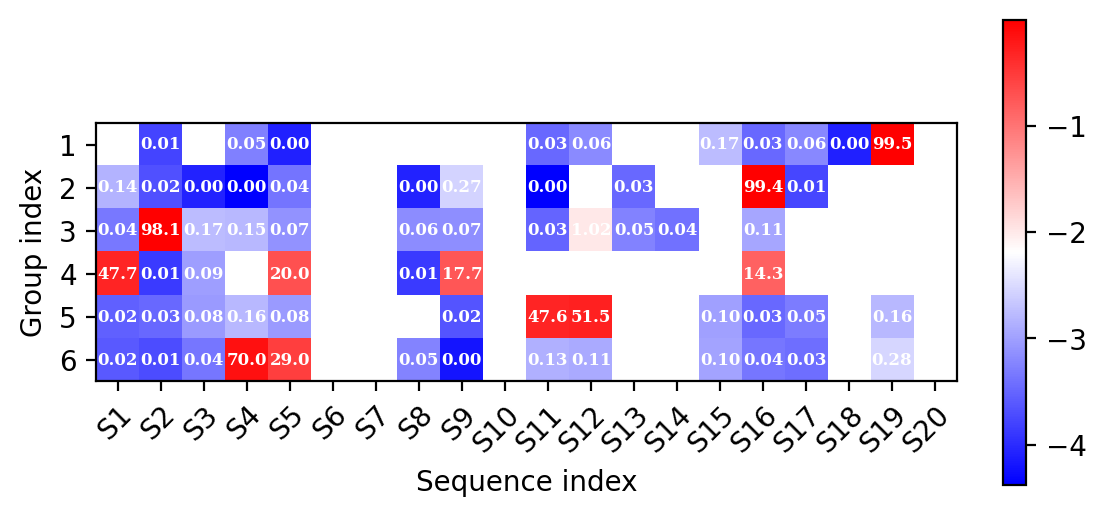

In [17]:
def draw(xLabel,yLabel,heatlist,title):
    
    #作图阶段
    fig = plt.figure(dpi =200)
    #定义画布为1*1个划分，并在第1个位置上进行作图
    ax = fig.add_subplot(111)
    #定义横纵坐标的刻度
    ax.set_xticks(np.arange(len(xLabel)), labels=xLabel)
    ax.set_yticks(np.arange(len(yLabel)), labels=yLabel)
    
    #作图并选择热图的颜色填充风格，这里选择hot
    im = ax.imshow(heatlist, cmap=plt.get_cmap("bwr"))
    
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")
 
    # Loop over data dimensions and create text annotations.
    for i in range(len(yLabel)):
        for j in range(len(xLabel)):
            text = ax.text(j, i, str(np.vstack((mean_count[3:6], mean_count[0:3]))[i, j]*100)[:4],ha="center", va="center", color="w", fontdict={'family':'serif',
     'style':'normal',
    'weight':'bold',
      'color':'white',
      'size':6
})
    #增加右侧的颜色刻度条
    plt.colorbar(im,fraction=0.025, pad=0.05)
    plt.xlabel("Sequence index")
    plt.ylabel("Group index")
    #增加标题
    plt.title(title)
    #show
    plt.show()

heatlist1 = np.array(np.vstack((np.log10(mean_count[3:6]), np.log10(mean_count[0:3]))))
# heatlist1 = np.array(np.vstack(((mean_count[3:6]), (mean_count[0:3]))))
#定义热图的横纵坐标
xLabel1 = ["S1", "S2","S3", "S4", "S5", "S6","S7", "S8", "S9","S10", "S11", "S12", "S13",
          "S14", "S15","S16", "S17", "S18", "S19","S20"]
yLabel1 = ["1", "2", "3", "4", "5", "6"]
 
title1=''



d = draw(xLabel1,yLabel1,heatlist1,title1)


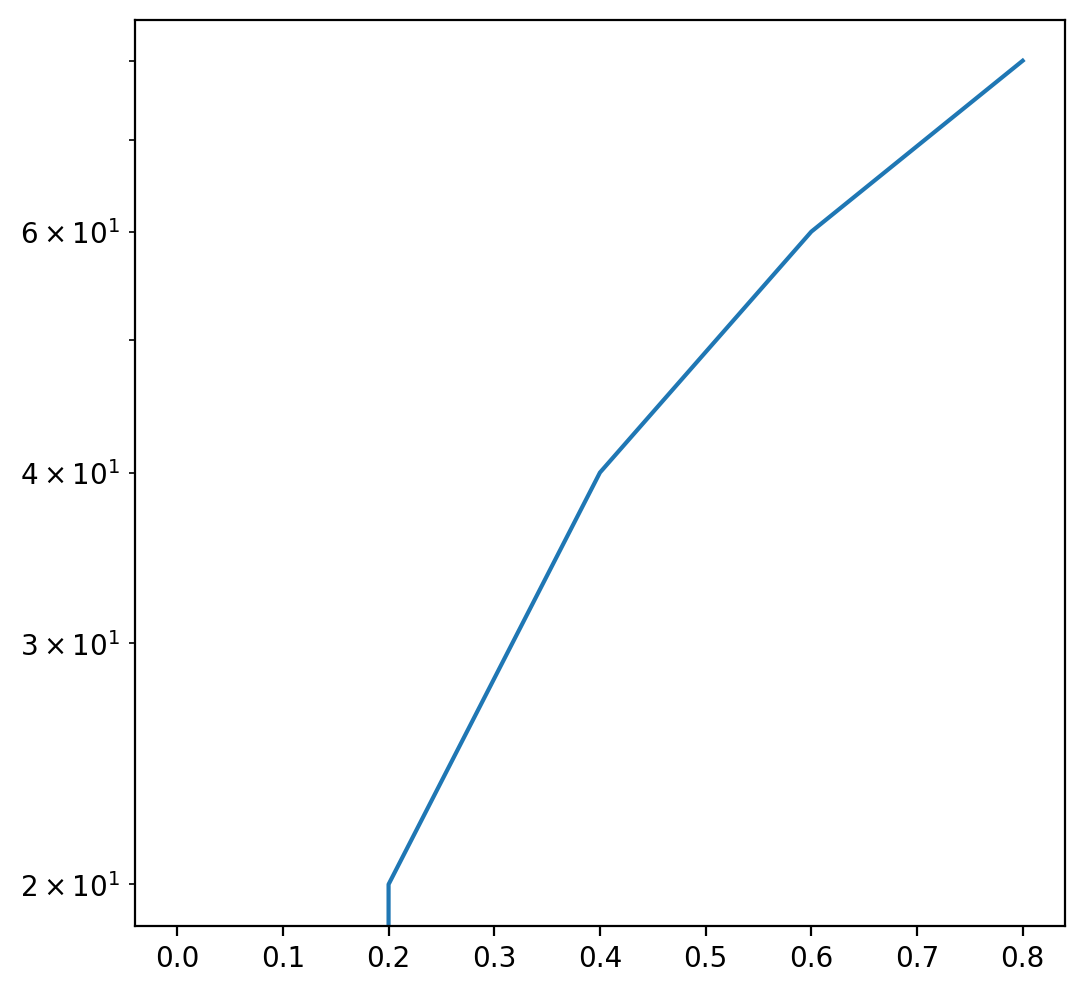

In [63]:
plt.figure(figsize=(6, 6))
plt.plot(np.arange(0, 1, 0.2), np.arange(0, 1, 0.2))
plt.xscale("log")

0.00027793218454697053
0.00033351862145636465
0.0008893829905503057
0.001612006670372429
0.0008893829905503057
0.0
0.0
0.0
0.00022234574763757643
0.0
0.4763757643135075
0.5159533073929962
0.0
0.0
0.0010005558643690939
0.00033351862145636465
0.0005002779321845469
0.0
0.001612006670372429
0.0


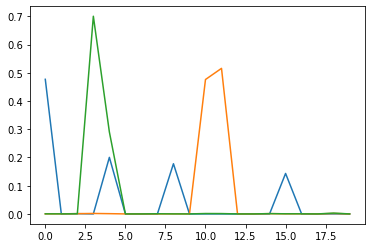

In [7]:
mean_count = []
for i in range(6):
    mean_count.append(final_f_seq[i] + final_r_seq[i])
    
for i in range(6):
    mean_count[i] = mean_count[i] / np.sum(mean_count[i])
x = np.arange(0, 20, 1)

plt.plot(x, mean_count[0])
plt.plot(x, mean_count[1])
plt.plot(x, mean_count[2])
# plt.yscale("log")

for i in mean_count[1]:
    print(i)

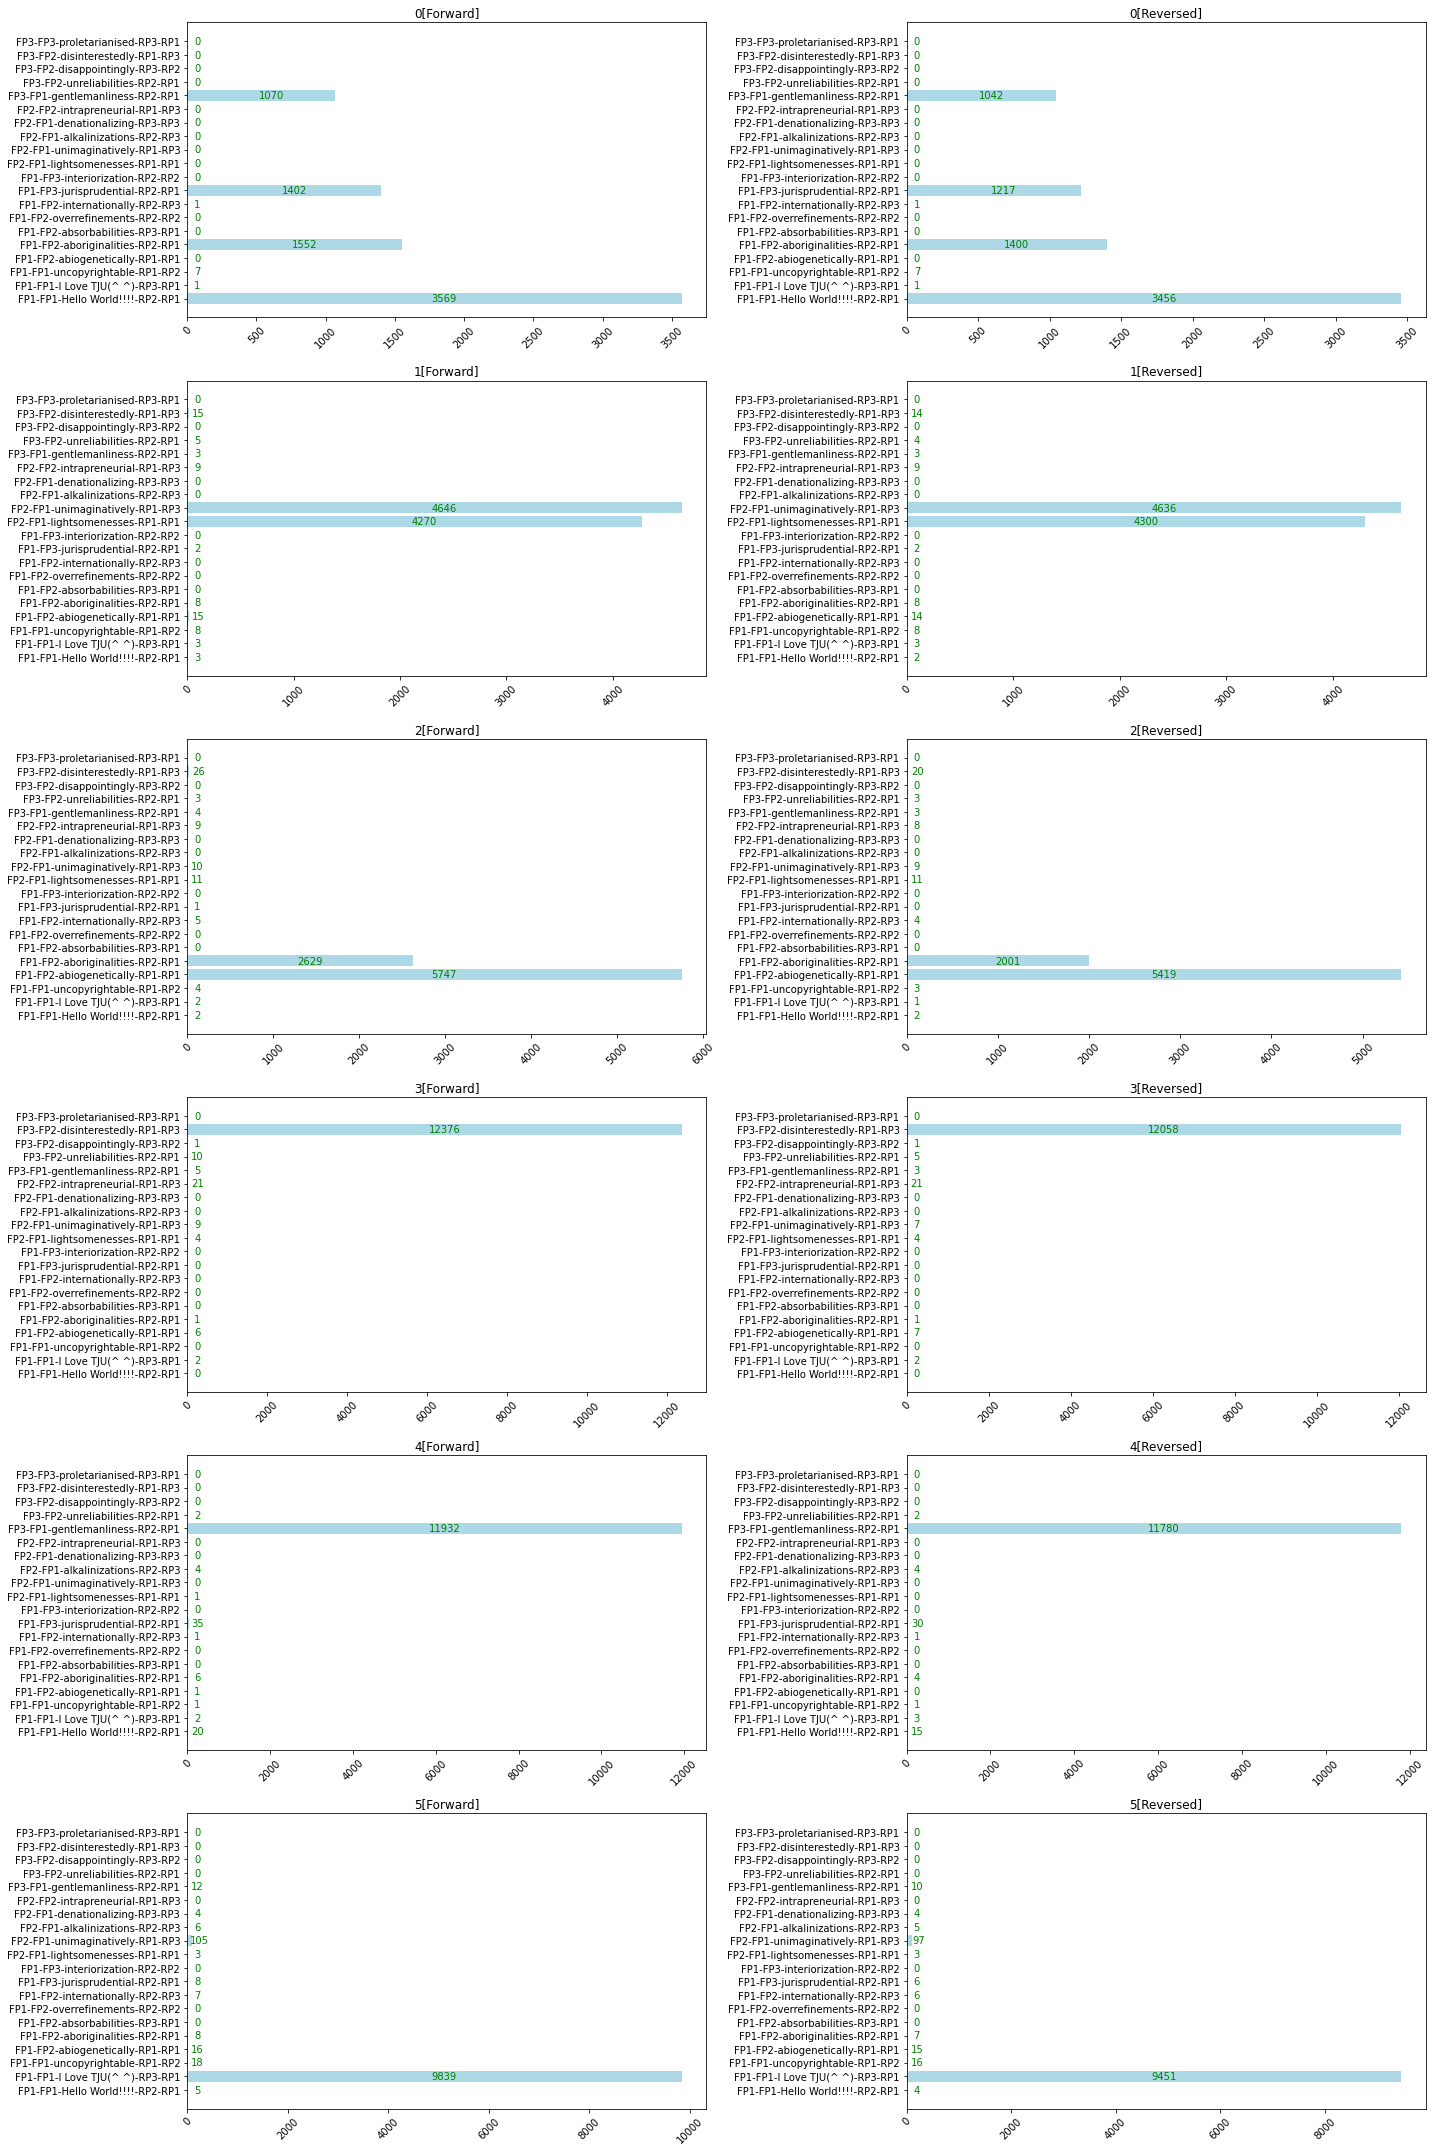

In [77]:
import mappy as mp
import operator
import matplotlib.pyplot as plt
import numpy as np


all_f_seq_counts = [0 for _ in range(len(all_f_seqs))]

ffs = os.listdir(f_path)
total_f_count = 0
for file in ffs:
    file_type = os.path.splitext(file)[1]
    if file_type == ".fq":
        total_f_count += 1
    else:
        continue
rfs = os.listdir(r_path)
total_r_count = 0
for file in rfs:
    file_type = os.path.splitext(file)[1]
    if file_type == ".fq":
        total_r_count += 1
    else:
        continue


plt.figure(figsize=(20,5*total_f_count)) 
for file_index in range(total_f_count):
    all_f_seq_counts = [0 for _ in range(len(all_f_seqs))]
    all_r_seq_counts = [0 for _ in range(len(all_r_seqs))]
    
    mp_data = mp.fastx_read(f_path + "/" + str(file_index+1) + ".fq", read_comment=True)
    mp_data_r = mp.fastx_read(r_path + "/" + str(file_index + 1) + ".fq", read_comment=True)
    read_count = 0

    for read in mp_data:
        for seq in all_f_seqs:
            if operator.contains(read[1], seq):
                all_f_seq_counts[all_f_seqs.index(seq)] += 1
    read_count += 1
    plt.subplot(total_f_count, 2, (file_index)*2 + 1)
    barh = plt.barh(range(len(symbles)), all_f_seq_counts, tick_label=symbles, color='lightblue')
    plt.bar_label(barh, label_type="center", color='green', padding=10)
    plt.xticks(rotation=45)
    plt.title(str(file_index) + "[Forward]")
        
    for read in mp_data_r:
        for seq in all_r_seqs:
            if operator.contains(read[1], seq):
                all_r_seq_counts[all_r_seqs.index(seq)] += 1
        
    plt.subplot(total_f_count, 2, (file_index+1)*2)
    barh = plt.barh(range(len(symbles)), all_r_seq_counts, tick_label=symbles, color='lightblue')
    plt.bar_label(barh, label_type="center", color='green', padding=10)
    plt.xticks(rotation=45)
    plt.title(str(file_index) + "[Reversed]")


plt.tight_layout()
plt.savefig("fig.jpg", dpi=400)
plt.show()


# 结果绘图

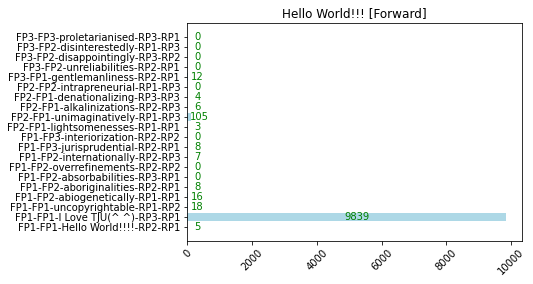

In [78]:
import matplotlib.pyplot as plt
import numpy as np

barh = plt.barh(range(len(symbles)), all_f_seq_counts, tick_label=symbles, color='lightblue')
plt.bar_label(barh, label_type="center", color='green', padding=10)
plt.xticks(rotation=45)
#plt.figure(figsize=(30,40)) 
plt.title("Hello World!!! [Forward]")
fig = plt.gcf()
plt.show()
fig.tight_layout()
fig.savefig("fig.jpg", dpi=400)

In [30]:
import math

MAX_OF_PRIMER_LIB = 12396

x = np.arange(1, 1e5, 1)
y1 = np.arange(1, 12397, 1)

y2 = np.ceil(2*np.power(x, np.ones_like(x)/2/1))
y3 = np.ceil(2*np.power(x, np.ones_like(x)/2/2))
y4 = np.ceil(2*np.power(x, np.ones_like(x)/2/3))

print(y2[5000], y3[5000], y4[5000])

142.0 17.0 9.0


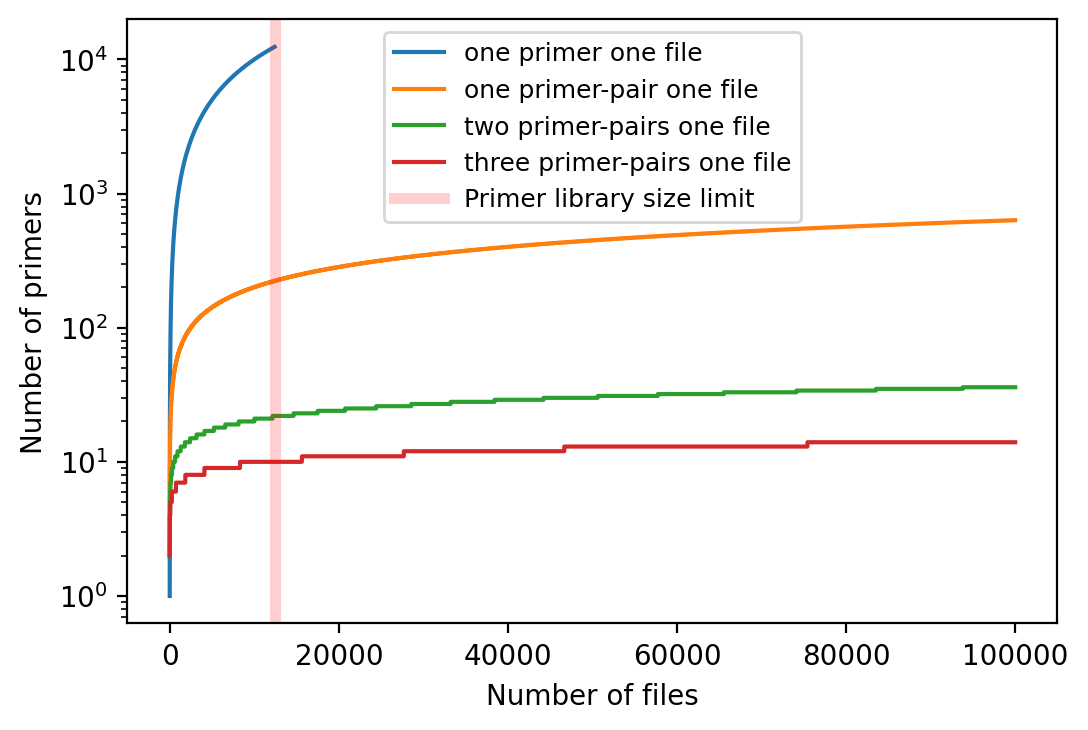

In [121]:
plt.figure(dpi=200)

plt.plot(x[:12396], y1, label="one primer one file")
plt.plot(x, y2, label="one primer-pair one file")
plt.plot(x, y3, label="two primer-pairs one file")
plt.plot(x, y4, label="three primer-pairs one file")

plt.axvline(12396, linewidth=4, c="#ff000030", label="Primer library size limit")
plt.ylabel("Number of primers")
plt.xlabel("Number of files")
plt.yscale('log')
plt.legend(fontsize=9)

plt.show()

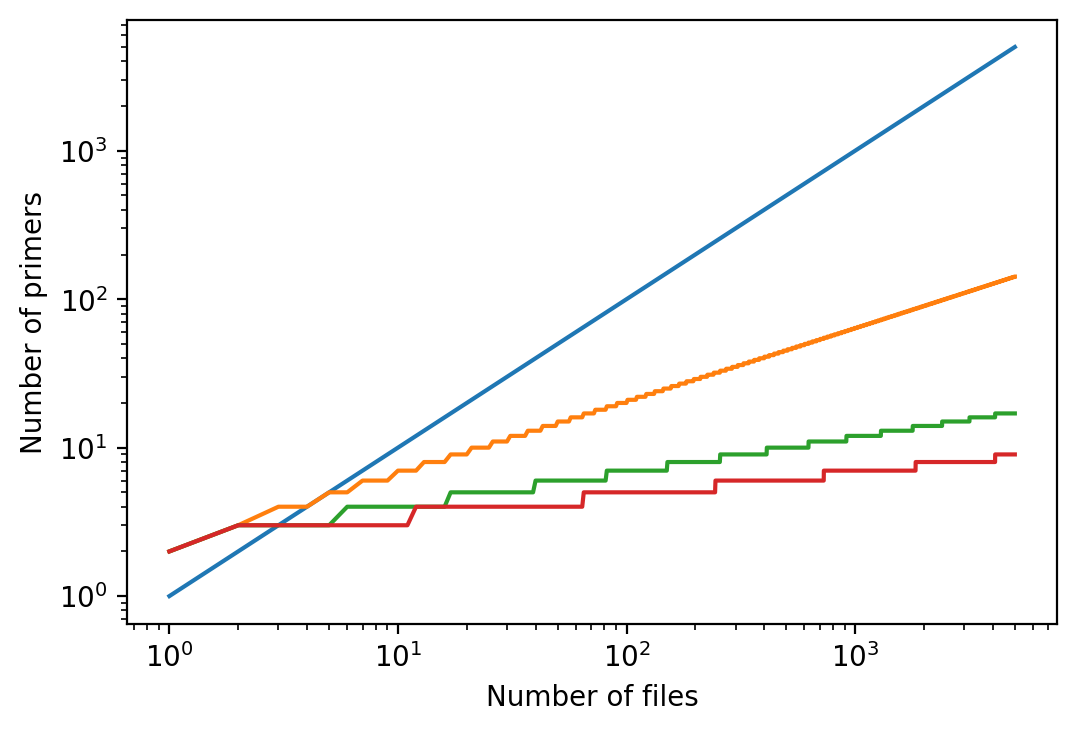

In [127]:
x = np.arange(1, 5000, 1)
y1 = np.arange(1, 5000, 1)

y2 = np.ceil(2*np.power(x, np.ones_like(x)/2/1))
y3 = np.ceil(2*np.power(x, np.ones_like(x)/2/2))
y4 = np.ceil(2*np.power(x, np.ones_like(x)/2/3))

plt.figure(dpi=200)

plt.plot(x, y1, label="one primer one file")
plt.plot(x, y2, label="one primer-pair one file")
plt.plot(x, y3, label="two primer-pairs one file")
plt.plot(x, y4, label="three primer-pairs one file")

plt.ylabel("Number of primers")
plt.xlabel("Number of files")
plt.yscale("log")
plt.xscale("log")
# plt.legend(fontsize=9)

plt.show()